In [2]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [3]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and t

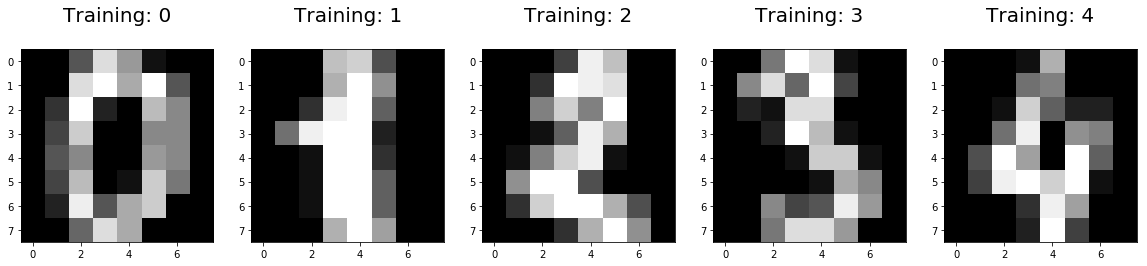

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [12]:
# TODO: train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [10]:
# TODO: batch gradient descent (GD) for Logistic regression

# softmax
def softmax(x):
    e = np.exp(x - np.max(x))  # prevent overflow
    if e.ndim == 1:
        return e / np.sum(e, axis=0)
    else:  
        return e / np.array([np.sum(e, axis=1)]).T  # ndim = 2

# encode integer labels to binary vectors
def yMatrix(y, num_class):
    Y = np.zeros((len(y), num_class))
    Y[range(len(y)), y] = 1
    return Y

# batch gradient descent (GD) for Logistic regression
def LogisticRegression_GD(X, y, lr = 0.1, eta = 0.3, eps = 0.0005, max_iter = 500, print_iter = 20, bias = True, verbose = True):
    
    ncvg = True
    it = 0
    n, d = X.shape
    lr /= float(n)
    loss = []
    num_class = len(np.unique(y))
    Y = yMatrix(y, num_class)
    W = np.zeros((d, num_class))
    
    if bias:
        X = np.concatenate([X, np.ones((n, 1))], axis=1)
        W = np.concatenate([W, np.ones((1, num_class))], axis = 0)

    # optimization loop	
    while ncvg and it < max_iter:

        # gradient descent
        logits = softmax(np.matmul(X, W))
        grad = np.matmul(X.T, Y - logits) - eta * W
        W = W + lr * grad
        loss.append(-np.sum(np.log(logits[range(n), y])) / float(n))

        # Stop criterion
        if it > 0:
            if abs(loss[it]-loss[it-1]) < eps:
                ncvg = False
                break
        
        if it % print_iter == 0 and verbose:
            print('iteration', it, ': loss =', loss[it])
            
        it += 1
    
    print('iteration', it-1, ': loss =', loss[-1], 'converged.')
    
    if bias:
        b = W[-1]
        W = W[:d]
    else:
        b = np.zeros(num_class)

    return (W, b, loss)

# prediction function
def pred_fn(X, W, b, bias = True):
    if bias:
        pred = np.argmax(np.matmul(X, W) + b, axis = 1)
    else:
        pred = np.argmax(np.matmul(X, W), axis = 1)
    return pred

# precision
def precision(pred, y):
    return sum(np.equal(pred, y)) / float(len(y))

---------------------------------------
learning rate = 0.05
iteration 0 : loss = 2.3025850929940455
iteration 20 : loss = 0.46210147707569266
iteration 40 : loss = 0.11147316403134708
iteration 60 : loss = 0.08413649050014609
iteration 80 : loss = 0.06975957921150064
iteration 100 : loss = 0.06017819765421982
iteration 120 : loss = 0.05307575425133638
iteration 140 : loss = 0.04753623510784326
iteration 160 : loss = 0.04310366601157713
iteration 180 : loss = 0.039511891483588114
iteration 200 : loss = 0.03657605505855327
iteration 220 : loss = 0.03415059881881445
iteration 232 : loss = 0.03279149062358042 converged.
training precision = 0.9962880475129918
test precision = 0.9666666666666667
---------------------------------------
learning rate = 0.005
iteration 0 : loss = 2.3025850929940455
iteration 20 : loss = 0.6130190960042627
iteration 40 : loss = 0.398412588799218
iteration 60 : loss = 0.31484351267505695
iteration 80 : loss = 0.26833109975686803
iteration 100 : loss = 0.2379270

(0, 3)

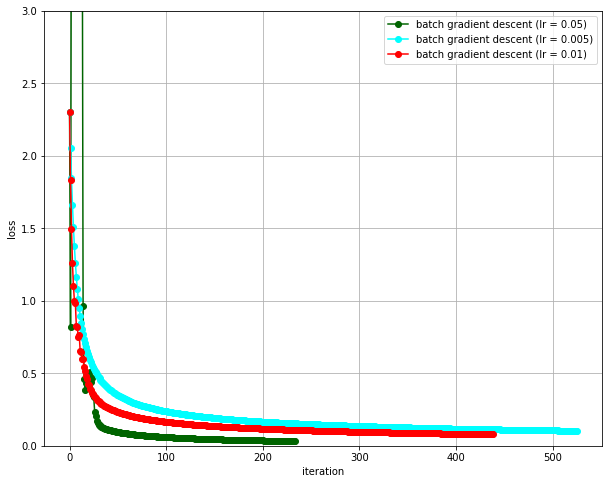

In [13]:
# evaluation of different learning rate
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(learning_rate)):
    
    print('---------------------------------------')
    print('learning rate =', learning_rate[i])
    
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i], eta = 1.0e-1, eps = 1.0e-4, max_iter = 1000, bias = True)
    
    pred_train = pred_fn(X_train, W, b)
    prec_train = precision(pred_train, y_train)
    print('training precision =', prec_train)

    pred_test = pred_fn(X_test, W, b)
    prec_test = precision(pred_test, y_test)
    print('test precision =', prec_test)
    
    plt.plot(loss_GD, c = cl[i], ls = '-', marker = 'o', label = 'batch gradient descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('iteration')
plt.ylabel('loss')
plt.ylim(0, 3)

In [15]:
# TODO: stochastic gradient descent (SGD) for Logistic regression

# minibatch iterator
def iterate_minibatches(X, y, Y, batchsize, shuffle=False):
    assert X.shape[0] == y.shape[0]
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, X.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield X[excerpt], y[excerpt], Y[excerpt]

# stochastic gradient descent (SGD) for Logistic regression
def LogisticRegression_SGD(X, y, batch_size = 100, lr = 1.0e-1, eta = 0.3, eps = 0.0005, 
                           max_epoch = 500, print_epoch = 20, lr_epoch = 10, stop_epoch = 20, 
                           bias = True, shuffle = True, verbose = True):
    
    ncvg = True
    epoch = 0
    n, d = X.shape
    loss = []
    num_class = len(np.unique(y))
    Y = yMatrix(y, num_class)
    W = np.zeros((d, num_class))
    
    if bias:
        X = np.concatenate([X, np.ones((n, 1))], axis=1)
        W = np.concatenate([W, np.ones((1, num_class))], axis = 0)

    # optimization loop	
    while ncvg and epoch < max_epoch:
        
        loss_epoch = 0.0
        for Xb, yb, Yb in iterate_minibatches(X, y, Y, batch_size, shuffle):
            
            # minibatch gradient descent
            nb = len(yb)
            logits = softmax(np.matmul(Xb, W))
            grad = np.matmul(Xb.T, Yb - logits) - eta * W
            W = W + (lr / float(nb)) * grad
            loss_epoch += -np.sum(np.log(logits[range(nb), yb]))
            
        loss.append(loss_epoch / float(n))
        
        # half lr if not improving in lr_epoch epochs
        if epoch > lr_epoch:
            if loss[epoch - lr_epoch] <= loss[epoch] - eps:
                lr *= 0.5
                print('halfing learning rate to', lr)
        
        # stop if not improving in stop_epoch epochs
        if epoch > stop_epoch:
            if loss[epoch - stop_epoch] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch-1]) <= eps:                
                ncvg = False
                break
        
        if epoch % print_epoch == 0 and verbose:
            print('epoch', epoch, ': loss =', loss[epoch])
            
        epoch += 1
    
    print('epoch', epoch-1, ': loss =', loss[-1])
    
    if bias:
        b = W[-1]
        W = W[:d]
    else:
        b = np.zeros(num_class)

    return (W, b, loss)

---------------------------------------
batch_size = 10
epoch 0 : loss = 1.0278805642649436
epoch 10 : loss = 0.1466700661565617
epoch 20 : loss = 0.10870644378383251
epoch 30 : loss = 0.0905012927925959
epoch 40 : loss = 0.07751210924897542
epoch 50 : loss = 0.07056413041282847
epoch 60 : loss = 0.06383412223540201
epoch 70 : loss = 0.05940210655891005
epoch 70 : loss = 0.0593909975586743
training precision = 0.9948032665181886
test precision = 0.9733333333333334
---------------------------------------
batch_size = 50
epoch 0 : loss = 1.0869329529772576
epoch 10 : loss = 0.14621203136590227
epoch 20 : loss = 0.1034254085529823
epoch 30 : loss = 0.08469374370539669
epoch 40 : loss = 0.07216516992547133
epoch 50 : loss = 0.06117935387558691
epoch 55 : loss = 0.05895881091496163
training precision = 0.9903489235337788
test precision = 0.9733333333333334
---------------------------------------
batch_size = 100
epoch 0 : loss = 1.3483289592338845
epoch 10 : loss = 0.1466256908038817
epoch 

Text(0, 0.5, 'loss')

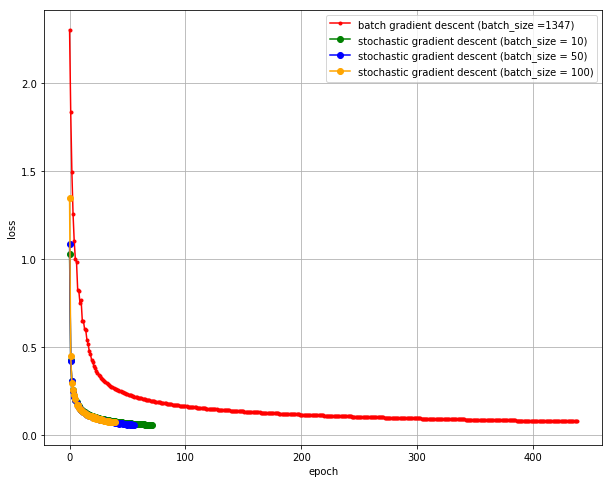

In [16]:
# TODO: evaluation of different batch size
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
lr = [1.0e-3, 5.0e-3, 1.0e-2]
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(loss_GD, 'r.-', label = 'batch gradient descent (batch_size =' + str(len(y_train)) + ')')

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 2.0e-1, eps = 1.0e-4, 
                                    max_epoch = 500, print_epoch = 10, lr_epoch = 10, stop_epoch = 20, 
                                    bias = True, shuffle = True, verbose = True)
    
    pred_train = pred_fn(X_train, W, b)
    prec_train = precision(pred_train, y_train)
    print('training precision =', prec_train)

    pred_test = pred_fn(X_test, W, b)
    prec_test = precision(pred_test, y_test)
    print('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

In [25]:
# not part of hws
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, data_home='mnist/')
#X, y = fetch_openml('Fashion-MNIST', return_X_y=True, data_home='fashion/')

In [26]:
y = np.asarray(list(map(int, y)))
X = np.asarray(X.astype(float))

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=8)

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

---------------------------------------
batch_size = 128
epoch 0 : loss = 0.752734775097152
halfing learning rate to 1e-05
epoch 20 : loss = 0.2975660656686482
halfing learning rate to 5e-06
halfing learning rate to 2.5e-06
epoch 40 : loss = 0.2849465220070623
halfing learning rate to 1.25e-06
epoch 60 : loss = 0.2827475942587156
halfing learning rate to 6.25e-07
halfing learning rate to 3.125e-07
halfing learning rate to 1.5625e-07
epoch 80 : loss = 0.28148911084720596
halfing learning rate to 7.8125e-08
halfing learning rate to 3.90625e-08
halfing learning rate to 1.953125e-08
halfing learning rate to 9.765625e-09
halfing learning rate to 4.8828125e-09
epoch 100 : loss = 0.28100810258080555
halfing learning rate to 2.44140625e-09
halfing learning rate to 1.220703125e-09
halfing learning rate to 6.103515625e-10
halfing learning rate to 3.0517578125e-10
halfing learning rate to 1.52587890625e-10
halfing learning rate to 7.62939453125e-11
halfing learning rate to 3.814697265625e-11
half

Text(0, 0.5, 'loss')

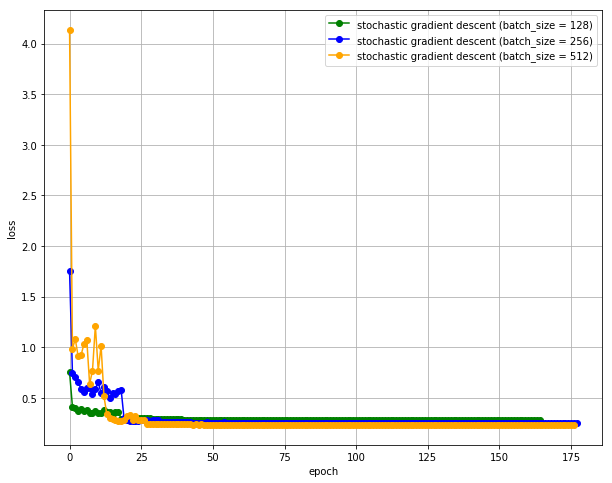

In [29]:
# TODO: evaluation of different batch size
bs = [128, 256, 512]
cl = ['green', 'blue', 'orange']
lr = [2.0e-5, 4.0e-5, 6.0e-5]
fig, ax = plt.subplots(figsize=(10, 8))
#plt.plot(loss_GD, 'r.-', label = 'batch gradient descent (batch_size =' + str(len(y_train)) + ')')

for i in range(len(bs)):
    
    print('---------------------------------------')
    print('batch_size =', bs[i])
    W, b, loss_SGD = LogisticRegression_SGD(X_train, y_train, bs[i], lr[i], eta = 1.0e+4, eps = 1.0e-8, 
                                    max_epoch = 500, print_epoch = 20, lr_epoch = 10, stop_epoch = 100, 
                                    bias = True, shuffle = True, verbose = True)
    
    pred_train = pred_fn(X_train, W, b)
    prec_train = precision(pred_train, y_train)
    print('training precision =', prec_train)

    pred_test = pred_fn(X_test, W, b)
    prec_test = precision(pred_test, y_test)
    print('test precision =', prec_test)
    
    plt.plot(loss_SGD, c = cl[i], ls = '-', marker = 'o', label = 'stochastic gradient descent (batch_size = ' + str(bs[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')